In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


In [3]:
df = pd.read_csv('credit card real.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

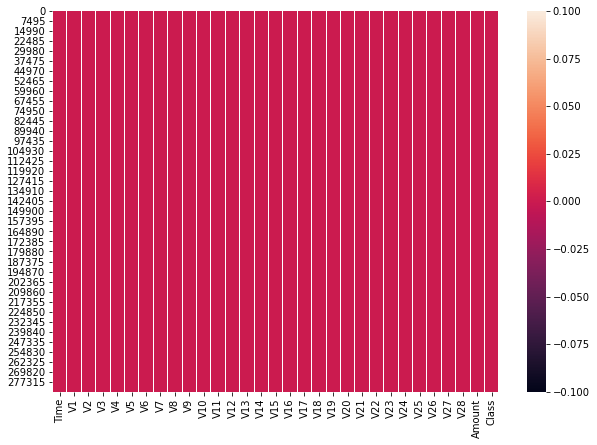

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
print('Frauds',round(df['Class'].value_counts()[1]/len(df)*100,3),'% of the data')

Frauds 0.173 % of the data


<AxesSubplot:xlabel='Class', ylabel='count'>

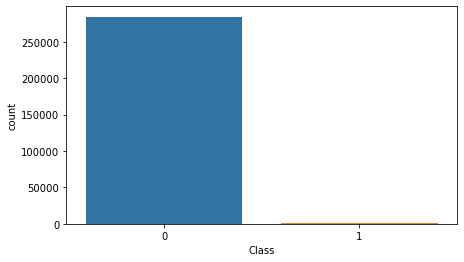

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(x='Class',data = df)

C:\Users\Ramawtar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramawtar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


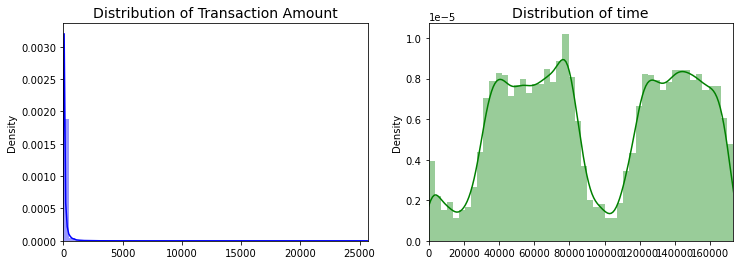

In [11]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
amount_val = df["Amount"].values
time_val = df["Time"].values
sns.distplot(amount_val, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val,ax = ax[1],color = 'green')
ax[1].set_title('Distribution of time',fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

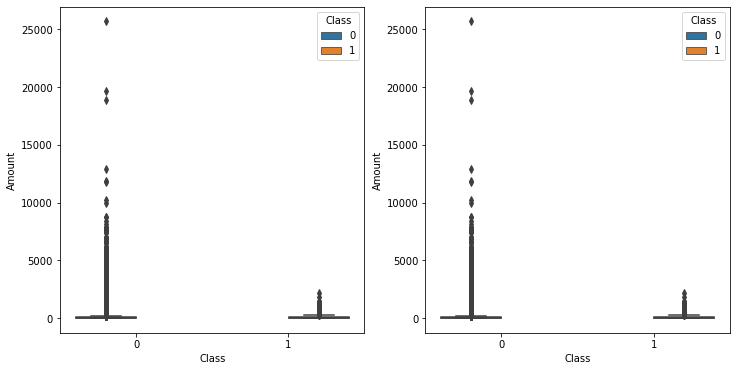

In [12]:
fig,ax = plt.subplots(1,2,figsize =(12,6))
s= sns.boxplot(ax=ax[0],data= df,x="Class",y="Amount",hue="Class")
s= sns.boxplot(ax= ax[1],data =df,x="Class",y="Amount",hue="Class")
plt.show()

In [13]:
corr = df.corr()

<AxesSubplot:>

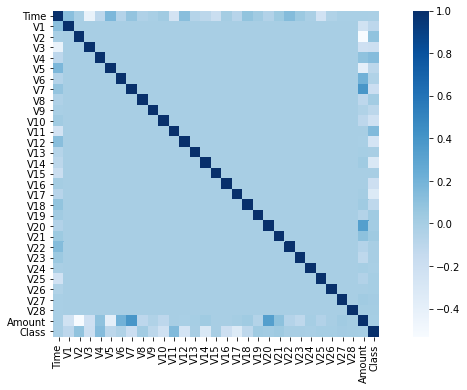

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,square=True,cmap='Blues')

In [15]:
non_fraud = df[df.Class==0]
fraud = df[df.Class==1]
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [16]:
legit_sample = non_fraud.sample(492)

In [17]:
print(legit_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [18]:
balanced_df = pd.concat([legit_sample, fraud], axis=0)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246526,153208.0,0.063189,-0.170636,0.860828,-0.557589,0.949355,0.323395,0.112777,-0.237562,0.708238,...,0.235077,1.176361,-0.341775,-1.079212,-0.838189,0.575104,-0.282974,-0.381954,5.99,0
282360,170844.0,-1.214592,-1.921934,-1.352143,-2.672004,0.093453,-0.941292,2.114058,-0.570652,-2.983533,...,0.467481,0.735142,0.609768,0.448635,0.971752,0.167734,-0.144065,0.147055,453.50,0
10086,15307.0,-0.995606,-0.113654,2.200482,1.753992,-0.808079,1.933076,1.005900,0.221433,1.750967,...,-0.383608,-0.647711,0.524812,-0.405738,0.015119,-0.442005,0.146716,-0.038415,298.88,0
158691,111644.0,2.071988,-0.883314,-1.259778,-0.815884,-0.658984,-1.241645,-0.208802,-0.376085,-0.493033,...,-0.015152,-0.222406,0.233868,-0.098437,-0.243145,-0.426653,-0.044131,-0.045438,83.16,0
119191,75365.0,1.273633,0.310485,0.264208,0.998616,-0.164093,-0.623553,0.073578,-0.138057,0.137594,...,-0.092163,-0.243154,-0.074979,-0.142269,0.598759,-0.406092,0.020363,0.019290,1.12,0


In [19]:
balanced_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

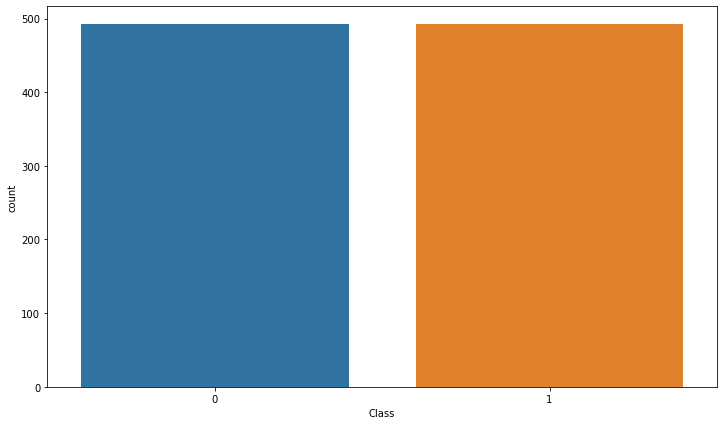

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class',data = balanced_df)

In [21]:
balanced_df.groupby('Class').describe()

Time                                                                   \
       count          mean           std    min       25%      50%        75%   
Class                                                                           
0      492.0  91709.973577  47320.459494   26.0  51223.75  79460.5  137257.75   
1      492.0  80746.806911  47835.365138  406.0  41241.50  75568.5  128483.00   

                    V1            ...       V28           Amount              \
            max  count      mean  ...       75%       max  count        mean   
Class                             ...                                          
0      172620.0  492.0  0.031176  ...  0.081517  1.245735  492.0   91.213963   
1      170348.0  492.0 -4.771948  ...  0.381152  1.779364  492.0  122.211321   

                                                          
              std  min     25%    50%       75%      max  
Class                                                     
0      387.785320  0.0  4.4625  20.23   81.6075  7862.39  
1      256.683288  0.0  1.0000   9.25  105.8900  2125.87  

[2 rows x 240 columns]

<AxesSubplot:>

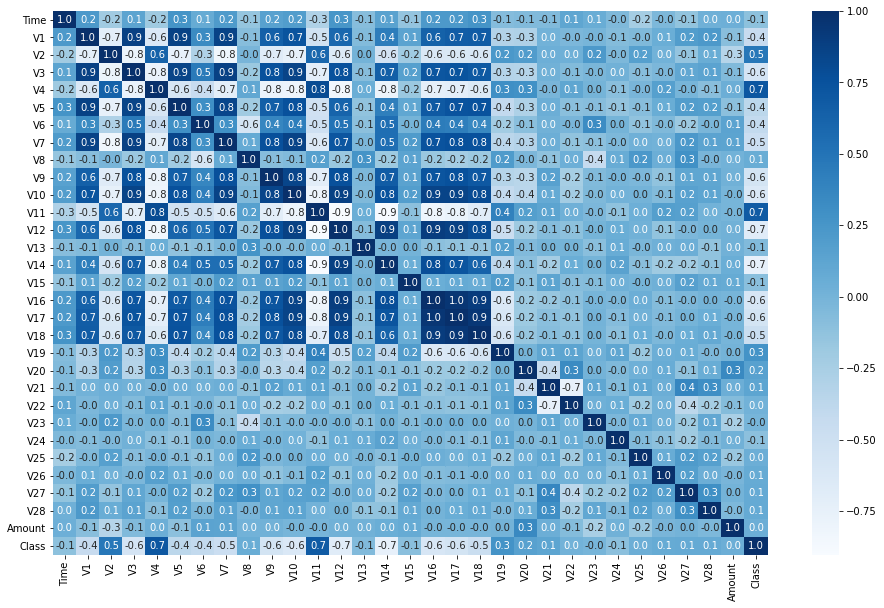

In [22]:
corr_balaced = balanced_df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_balaced, annot =True ,fmt = '.1f',cmap = 'Blues')

In [23]:
scaler = StandardScaler()
balanced_df['Amount_scaled'] = scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['Time_scaled'] = scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))
balanced_df = balanced_df.drop(columns=["Amount", "Time"], axis=1)


In [24]:
FEATURES = [col for col in balanced_df.columns if col not in ['Class']]
balanced_df["mean"]= balanced_df[FEATURES].mean(axis=1)
balanced_df["std"] = balanced_df[FEATURES].std(axis=1)
balanced_df["min"] = balanced_df[FEATURES].min(axis=1)
balanced_df["max"] = balanced_df[FEATURES].max(axis=1)

In [25]:
balanced_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,Amount_scaled,Time_scaled,mean,std,min,max
246526,0.063189,-0.170636,0.860828,-0.557589,0.949355,0.323395,0.112777,-0.237562,0.708238,0.306227,...,0.575104,-0.282974,-0.381954,0,-0.306273,1.399921,0.085241,0.647774,-1.298182,1.399921
282360,-1.214592,-1.921934,-1.352143,-2.672004,0.093453,-0.941292,2.114058,-0.570652,-2.983533,0.421592,...,0.167734,-0.144065,0.147055,0,1.054497,1.768526,-0.280041,1.232232,-2.983533,2.114058
10086,-0.995606,-0.113654,2.200482,1.753992,-0.808079,1.933076,1.005900,0.221433,1.750967,-0.684494,...,-0.442005,0.146716,-0.038415,0,0.584335,-1.482307,0.156469,1.180615,-2.654305,2.200482
158691,2.071988,-0.883314,-1.259778,-0.815884,-0.658984,-1.241645,-0.208802,-0.376085,-0.493033,0.765448,...,-0.426653,-0.044131,-0.045438,0,-0.071618,0.531204,-0.142422,0.738563,-1.891099,2.071988
119191,1.273633,0.310485,0.264208,0.998616,-0.164093,-0.623553,0.073578,-0.138057,0.137594,0.008458,...,-0.406092,0.020363,0.019290,0,-0.321082,-0.227053,0.031935,0.480036,-0.865909,1.273633


In [26]:
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(f"Train data is : {len(X_train)} \nTest data is : {len(X_test)}")

Train data is : 738 
Test data is : 246


In [28]:
RF_clf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 4,
    min_samples_split = 5,
    n_jobs = 4,
    random_state = 40,
    n_estimators = 100
)

RF_clf.fit(X_train, y_train)

RF_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, min_samples_split=5, n_jobs=4,
                       random_state=40)

In [29]:
y_pred = RF_clf.predict(X_test)

In [30]:
features = ['Time_scaled','Amount_scaled', 'mean', 'std', 'min', 'max', 'V1', 'V2', 'V3', 'V4', 'V5',
            'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
            'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

target = 'Class'

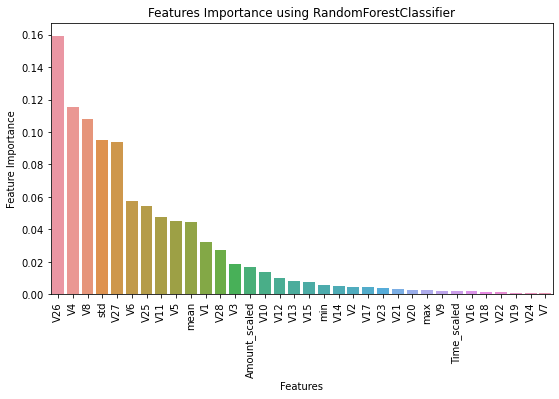

In [31]:
imp_fea = pd.DataFrame({'Features': features, 'Feature Importance': RF_clf.feature_importances_})
imp_fea = imp_fea.sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize = (9,5))
plt.title('Features Importance using RandomForestClassifier', fontsize=12)
s = sns.barplot(x='Features', y='Feature Importance', data=imp_fea)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       123
           1       0.97      0.93      0.95       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



<AxesSubplot:>

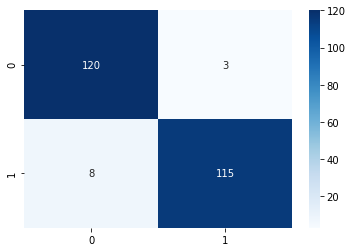

In [33]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

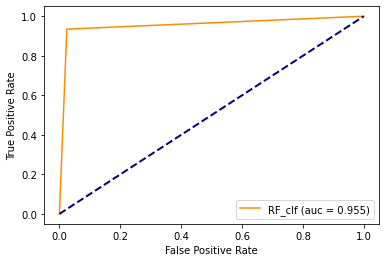

In [34]:
# Roc and auc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_s = auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", label=f'RF_clf (auc = %0.3f)' % auc_s)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [35]:
#finding best params
#forest = RandomForestClassifier()
#params = {
#            'criterion' : ['gini', 'entropy', 'log_loss'],
#            'n_estimators': [70, 100, 150, 200, 250, 300],
#              'max_depth' : [4, 8, 10, 20, 30, None],
#              'min_samples_split' :[5, 10, 20, 50, 100, 150, 200],
#
#        }
#CV_rfc = GridSearchCV(estimator=forest, param_grid=params, cv= 5)
#CV_rfc.fit(X_train, y_train)

In [36]:
Ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
Ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [37]:
y_pred_Ada = Ada_clf.predict(X_test)

In [38]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred_Ada)
print(f"Accuracy: {accuracy:.2f}")

# classification report
report = classification_report(y_test, y_pred_Ada)
print("Classification Report:\n", report)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       123
           1       0.95      0.93      0.94       123

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



<AxesSubplot:>

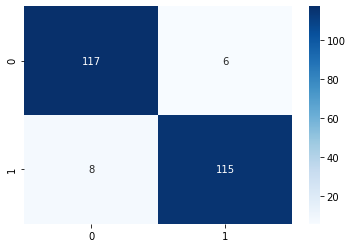

In [39]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_Ada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

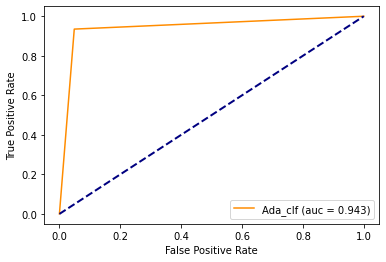

In [40]:
# Roc and auc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_Ada)
auc_s = auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", label=f'Ada_clf (auc = %0.3f)' % auc_s)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
